<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-thư-viện" data-toc-modified-id="Import-thư-viện-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import thư viện</a></span></li><li><span><a href="#Thu-thập-dữ-liệu" data-toc-modified-id="Thu-thập-dữ-liệu-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Thu thập dữ liệu</a></span></li><li><span><a href="#Khám-phá,-tiền-xử-lí-dữ-liệu" data-toc-modified-id="Khám-phá,-tiền-xử-lí-dữ-liệu-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Khám phá, tiền xử lí dữ liệu</a></span></li><li><span><a href="#Các-câu-hỏi-từ-dữ-liệu" data-toc-modified-id="Các-câu-hỏi-từ-dữ-liệu-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Các câu hỏi từ dữ liệu</a></span><ul class="toc-item"><li><span><a href="#Xây-dựng-ứng-dụng-về-các-chủ-đề-nào-là-tốt?" data-toc-modified-id="Xây-dựng-ứng-dụng-về-các-chủ-đề-nào-là-tốt?-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Xây dựng ứng dụng về các chủ đề nào là tốt?</a></span></li></ul></li></ul></div>

# Import thư viện

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import numpy as np

# Thu thập dữ liệu

- Chủ đề của dữ liệu: `Các ứng dụng trên Google Play Store`

Các thông tin về ứng dụng trên Google Play Store có thể thúc đẩy các doanh nghiệp sản xuất các ứng dụng thành công hơn. Ngoài ra, những thông tin này còn có thể giúp các nhà phát triển hiểu thêm và nắm bắt thị trường Android.

- Dữ liệu được lấy từ kaggle: https://www.kaggle.com/lava18/google-play-store-apps?select=googleplaystore.csv 

- Dữ liệu được thu thập như thế nào?

Dữ liệu được lấy trên Google Play Store

- Lấy dữ liệu file `googleplaystore.csv`

In [2]:
df = pd.read_csv("googleplaystore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


# Khám phá, tiền xử lí dữ liệu

- Dữ liệu có bao nhiêu dòng, cột?

In [3]:
nrow = df.shape[0]
ncol = df.shape[1]

In [4]:
print("Dữ liệu có {} dòng".format(nrow))
print("Dữ liệu có {} cột".format(ncol))

Dữ liệu có 10841 dòng
Dữ liệu có 13 cột


- Ý nghĩa của mỗi dòng là gì?`

Mỗi dòng tương ứng với mỗi App với các dữ liệu về tên app, loại app, rating, lượng review, kích cỡ, giá,...

- Dữ liệu có các dòng bị lặp không?

In [5]:
nduplicated = df.duplicated().sum()
print("Dữ liệu có {} dòng bị lặp".format(nduplicated))

Dữ liệu có 483 dòng bị lặp


- Có cột nào bị mất dữ liệu không?

In [6]:
def missing_ratio(s):
    return s.isna().mean() * 100
df.agg([missing_ratio])

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
missing_ratio,0.0,0.009224,13.596532,0.0,0.0,0.0,0.009224,0.0,0.0,0.009224,0.0,0.073794,0.018448


- Mô tả về ý nghĩa của mỗi cột

- Mỗi cột có kiểu dữ liệu gì?

In [7]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

`Nhận xét`:
- Cột Size, Install, Price cần chuyển cột này về kiểu dữ liệu dạng số.
- Cột Last Updated cần chuyển cột này về kiểu dữ liệu datetime.

- Với mỗi cột dữ liệu dạng số (numeric), các giá trị được phân bố như thế nào?

In [8]:
df["Size"] = df["Size"].apply(lambda x: x.replace("M", "e+6").replace("k","e+3").replace("Varies with device","0"))
df["Size"] = pd.to_numeric(df["Size"])

In [9]:
df["Installs"] = df["Installs"].apply(lambda x: x.replace("+", "").replace(",",""))
df["Installs"] = pd.to_numeric(df["Installs"])

In [10]:
df["Price"] = df["Price"].apply(lambda x: x.replace("$", ""))
df["Price"] = pd.to_numeric(df["Price"])

In [11]:
num_col_df = df.select_dtypes(exclude= 'object')
num_col_df.describe()

,Rating,Reviews,Size,Installs,Price
count,9367.000000,1.084100e+04,1.084100e+04,1.084100e+04,10841.000000
mean,4.191513,4.441119e+05,1.815069e+07,1.546291e+07,1.027273
std,0.515735,2.927629e+06,2.217006e+07,8.502557e+07,15.948971
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,2.600000e+06,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,9.200000e+06,1.000000e+05,0.000000
75%,4.500000,5.476800e+04,2.600000e+07,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+08,1.000000e+09,400.000000


- Sự phân bố các cột numeric

<ipython-input-12-2f9b1b529246>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df[df.describe().columns].hist(ax = ax)


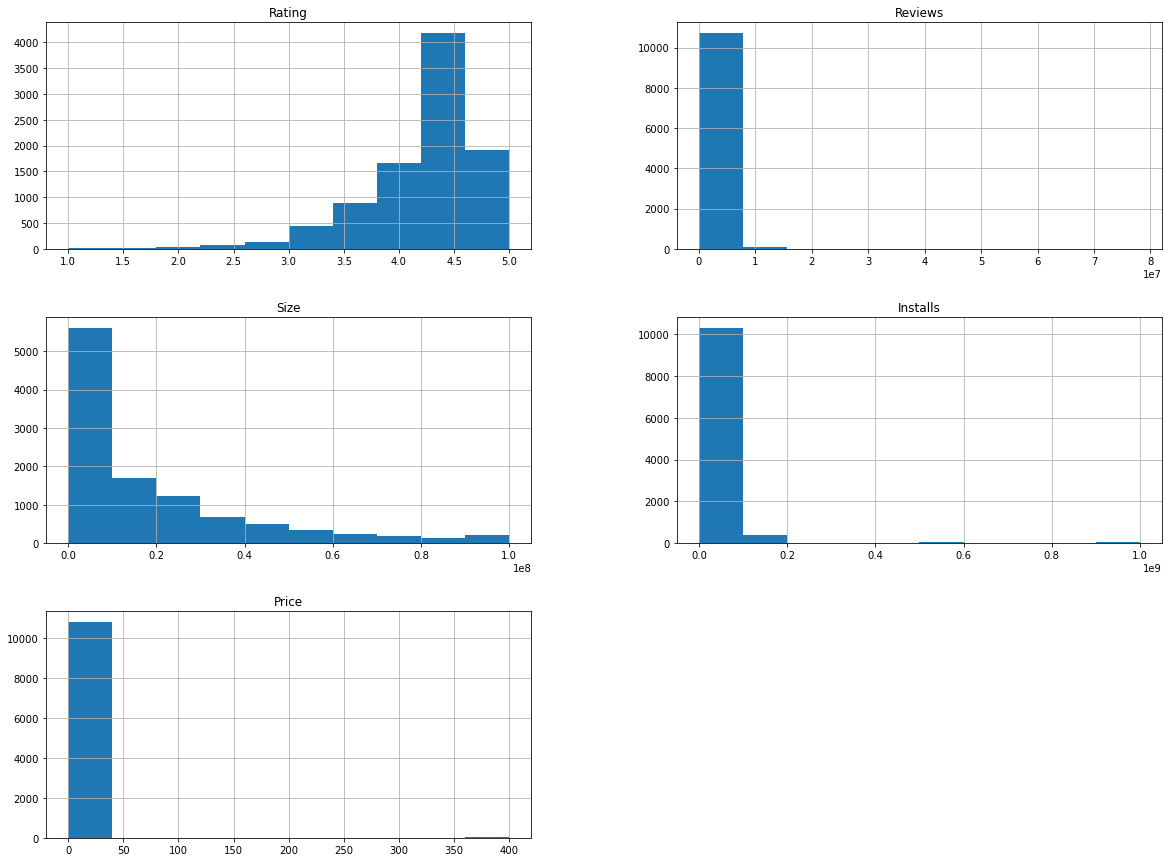

In [12]:
fig = plt.figure(figsize = (20,15))
ax = fig.gca()
df[df.describe().columns].hist(ax = ax)
plt.show()

- Chuyển cột Last Updated sang kiểu datetime

In [13]:
df["Last Updated"] = pd.to_datetime(df["Last Updated"], format = '%d-%b-%y', errors='coerce')

- Với mỗi cột dữ liệu dạng phân loại (categorical), các giá trị được phân bố như thế nào?

In [14]:
cate_col_df = df.select_dtypes(include= 'object')
cate_col_df.describe()

,App,Category,Type,Content Rating,Genres,Current Ver,Android Ver
count,10841,10840,10840,10841,10840,10833,10839
unique,9660,33,2,6,119,2783,33
top,ROBLOX,FAMILY,Free,Everyone,Tools,Varies with device,4.1 and up
freq,9,1972,10040,8715,842,1459,2451


# Các câu hỏi từ dữ liệu

## Xây dựng ứng dụng về các chủ đề nào là tốt?

- Các ứng dụng hiện này theo chủ đề nào là nhiều?

<AxesSubplot:xlabel='count', ylabel='Category'>

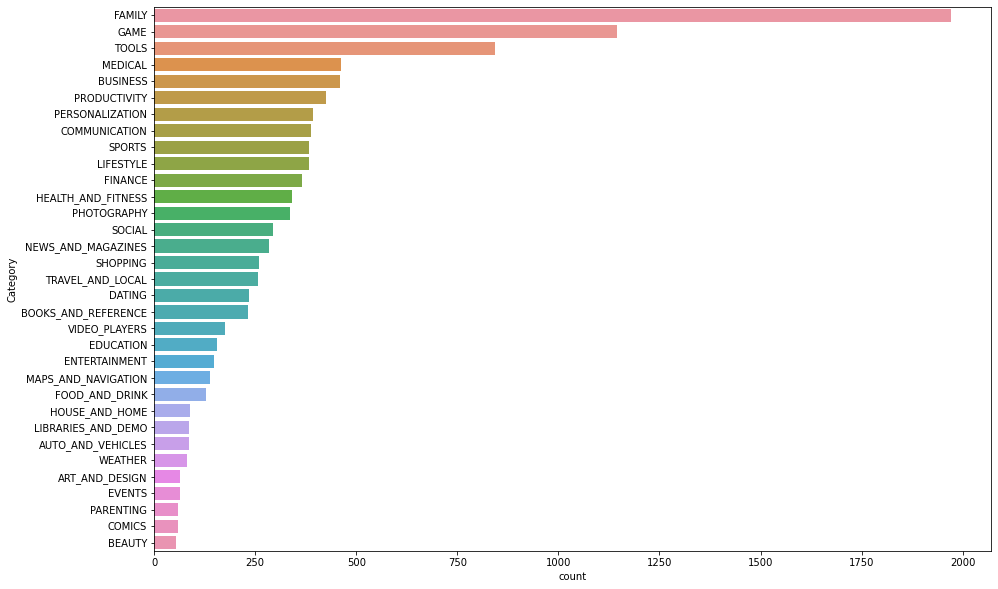

In [15]:
plt.figure(figsize=(15,10))
sns.countplot(y = "Category", data = df, order = df['Category'].value_counts().index)

- Lượng cài đặt ứng dụng với từng chủ đề là bao nhiêu?

<BarContainer object of 33 artists>

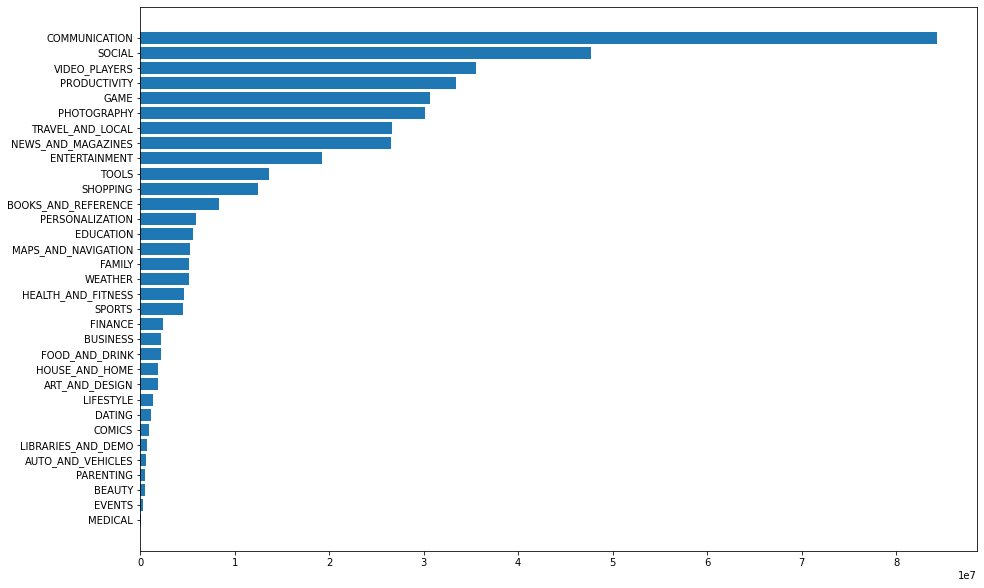

In [16]:
temp_df = df.groupby("Category")["Installs"].mean()
temp_df = temp_df.sort_values(ascending = True)
plt.figure(figsize=(15,10))
plt.barh(temp_df.index, temp_df)

- Lấy top 5 `Category` được cài nhiều mỗi năm

In [17]:
year_df = df.copy()
year_df["Year"] = df["Last Updated"].dt.year
###
g = year_df.groupby("Year")
res = g.apply(lambda x: x.reset_index().sort_values(by = "Installs", ascending=False).drop_duplicates(subset="Category").head(5)["Category"])
top5_category_year_df = pd.DataFrame(res)
top5_category_year_df = top5_category_year_df.reset_index().drop("level_1", axis=1)
top5_category_year_df.index = np.concatenate([[1],np.arange(0, 40)%5 + 1])
top5_category_year_df = top5_category_year_df.reset_index().rename(columns={'index': 'Top'})
top5_category_year_df = top5_category_year_df.pivot(index='Top', columns='Year', values='Category')
top5_category_year_df

Year,2010,2011,2012,2013,2014,2015,2016,2017,2018
Top,,,,,,,,,
1,FAMILY,TOOLS,LIBRARIES_AND_DEMO,FAMILY,FAMILY,GAME,VIDEO_PLAYERS,PHOTOGRAPHY,TOOLS
2,NaN,GAME,GAME,GAME,PERSONALIZATION,BOOKS_AND_REFERENCE,GAME,GAME,GAME
3,NaN,LIBRARIES_AND_DEMO,HEALTH_AND_FITNESS,LIBRARIES_AND_DEMO,TOOLS,PHOTOGRAPHY,TOOLS,TOOLS,SOCIAL
4,NaN,BOOKS_AND_REFERENCE,FAMILY,PRODUCTIVITY,GAME,VIDEO_PLAYERS,PRODUCTIVITY,FAMILY,COMMUNICATION
5,NaN,LIFESTYLE,PHOTOGRAPHY,SPORTS,COMMUNICATION,FAMILY,FAMILY,SPORTS,TRAVEL_AND_LOCAL


- Lấy top 5 `App` được cài đặt nhiều ứng với mỗi `Category`

In [18]:
g = df.groupby("Category")
res = g.apply(lambda x: x.reset_index().sort_values(by = "Installs", ascending=False).drop_duplicates(subset="App").head(5)["App"])
top5_app_category_df = pd.DataFrame(res)
top5_app_category_df = top5_app_category_df.reset_index().drop("level_1", axis=1)
top5_app_category_df.index = np.arange(0, 165)%5 + 1
top5_app_category_df = top5_app_category_df.reset_index().rename(columns={'index': 'Top'})
top5_app_category_df = top5_app_category_df.pivot(index='Top', columns='Category', values='App')
top5_app_category_df[["COMMUNICATION", "SOCIAL", "VIDEO_PLAYERS", "PRODUCTIVITY", "GAME", "PHOTOGRAPHY"]]

Category,COMMUNICATION,SOCIAL,VIDEO_PLAYERS,PRODUCTIVITY,GAME,PHOTOGRAPHY
Top,,,,,,
1,Messenger – Text and Video Chat for Free,Facebook,YouTube,Google Drive,Subway Surfers,Google Photos
2,Skype - free IM & video calls,Google+,Google Play Movies & TV,Microsoft Word,Temple Run 2,"Z Camera - Photo Editor, Beauty Selfie, Collage"
3,Google Chrome: Fast & Secure,Instagram,MX Player,Google Calendar,Candy Crush Saga,YouCam Perfect - Selfie Photo Editor
4,Hangouts,Snapchat,"VideoShow-Video Editor, Video Maker, Beauty Ca...",Dropbox,Pou,BeautyPlus - Easy Photo Editor & Selfie Camera
5,WhatsApp Messenger,Facebook Lite,VivaVideo - Video Editor & Photo Movie,Cloud Print,My Talking Tom,YouCam Makeup - Magic Selfie Makeovers


- Trong thể loại `GAME`

<AxesSubplot:xlabel='count', ylabel='Genres'>

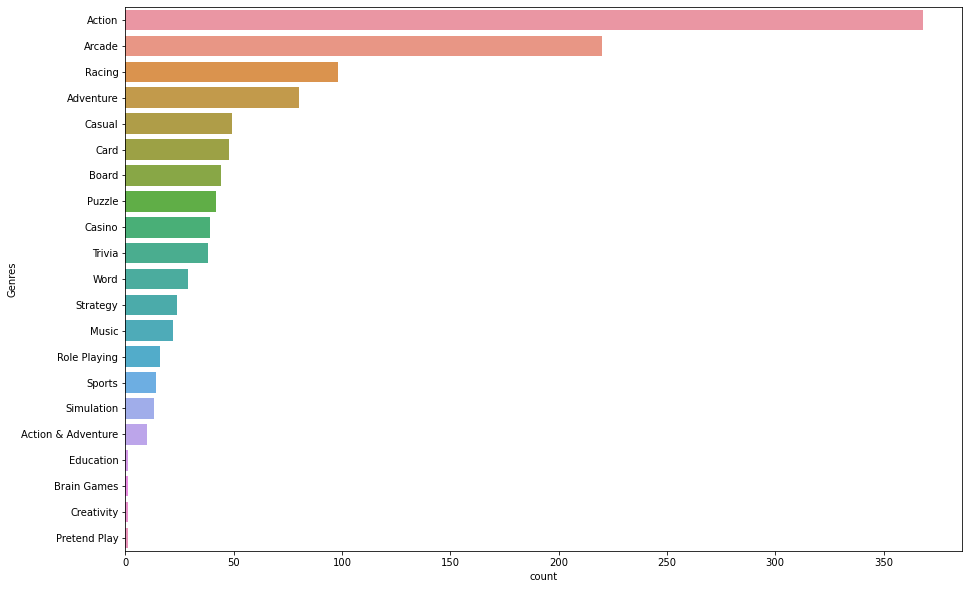

In [19]:
cate_game_sr = df[df["Category"] =="GAME"]["Genres"]
cate_game_sr = cate_game_sr.map(lambda x: x.split(";"))
cate_game_sr = cate_game_sr.explode("Genres")
plt.figure(figsize=(15,10))
sns.countplot(y = cate_game_sr, order = cate_game_sr.value_counts().index)

## Yếu tố ảnh hưởng đến Install

- Vẽ biểu đồ quan sát `Rating`, `Reviews`, `Size`, `Price` ảnh hưởng đến `Installs` như thế nào?

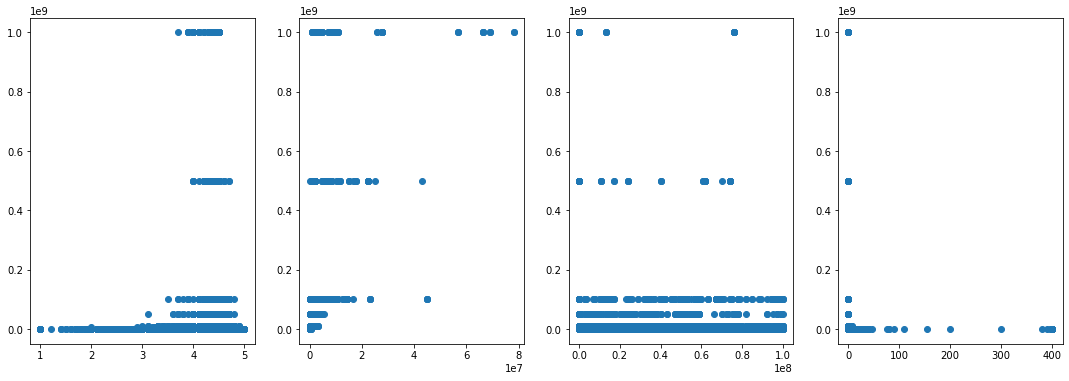

In [20]:
fig, axs = plt.subplots(1,4)
axs[0].scatter(year_df["Rating"], year_df["Installs"])
axs[1].scatter(year_df["Reviews"], year_df["Installs"])
axs[2].scatter(year_df["Size"], year_df["Installs"])
axs[3].scatter(year_df["Price"], year_df["Installs"])
fig.set_size_inches(18.5, 6)

- Lượng install trung bình qua các năm

<AxesSubplot:xlabel='Year'>

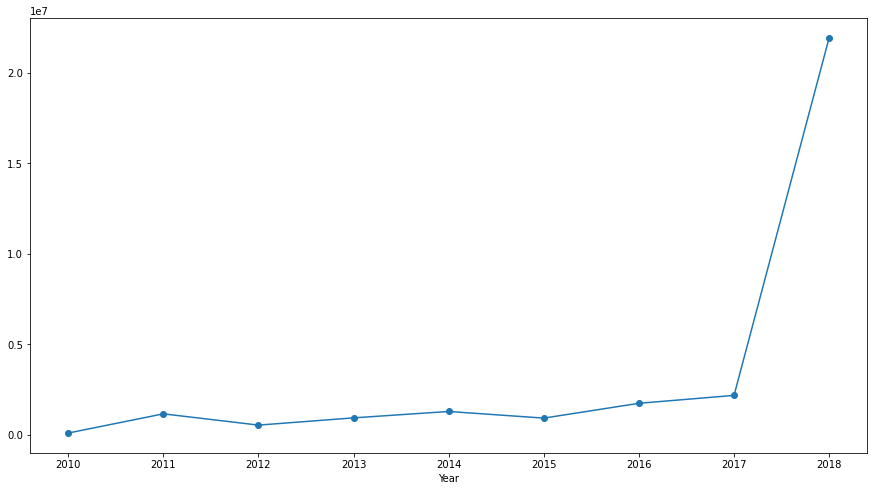

In [21]:
install_ysr = year_df.groupby("Year")["Installs"].mean()
install_ysr.plot(kind="line", marker = "o", figsize = (15,8))

`Nhận xét`: 
- Nhận thấy không thể qua quan sát bình thường có thể nhận thấy sự ảnh hưởng của các thuộc tính `Rating`, `Reviews`, `Size`, `Price` tới lượng `Installs`.
- Qua từng năm thì lượng Installs các ứng dụng càng ngày càng tăng vậy `Year` có phải ảnh hưởng lớn đến lượng Install không?

- Sử dụng thuật toán RandomForestClassifier để tìm ra tầm quan trọng của các thuộc tính ảnh hưởng đến lượng `Installs`

In [22]:
year_df = year_df.dropna()
y = year_df["Installs"]
x = year_df[["Rating", "Reviews", "Size", "Price", "Year"]]

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
clf_base = RandomForestClassifier()
grid = {'n_estimators': [10, 50, 100]}
clf_rf = GridSearchCV(clf_base, grid, cv=5, n_jobs=8, scoring='f1_macro')

clf_rf.fit(x, y)

/home/hai/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=8,
             param_grid={'n_estimators': [10, 50, 100]}, scoring='f1_macro')

Text(0.5, 1.0, 'Random Forest Classifier Feature Importance')

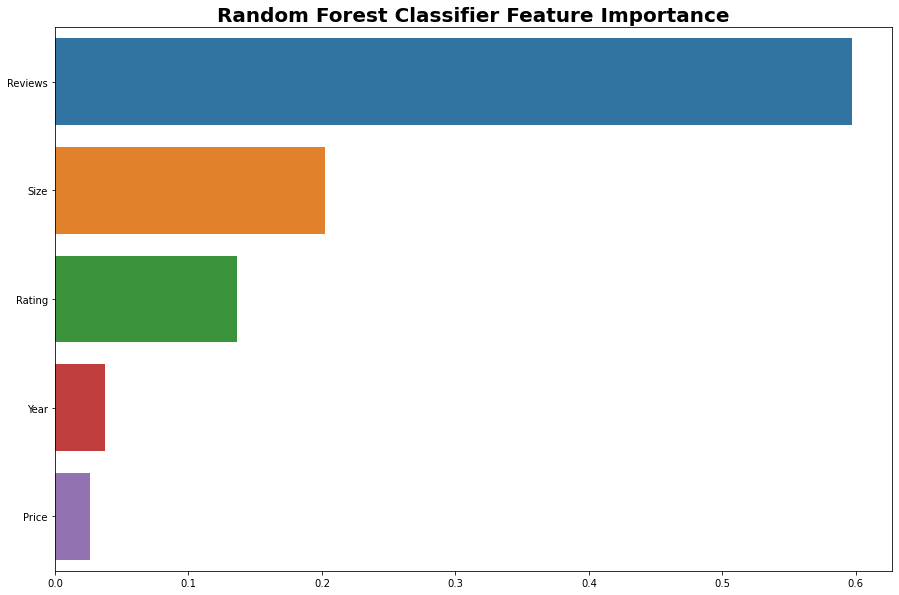

In [24]:
importances = pd.DataFrame(np.zeros((x.shape[1], 1)), columns=['importance'], index = x.columns)

importances.iloc[:,0] = clf_rf.best_estimator_.feature_importances_

importances.sort_values(by='importance', inplace=True, ascending=False)
importances30 = importances.head(30)

plt.figure(figsize=(15, 10))
sns.barplot(x='importance', y=importances30.index, data=importances30)

plt.xlabel('')
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.title('Random Forest Classifier Feature Importance', size=20, weight='bold')

`Nhận xét`:
- Quan sát kết quả của mô hình được xây dựng từ dữ liệu của chúng ta thì dường như 2 thuộc tính `Year` và `Price` không quá ảnh hưởng đến quyết định của người dùng, cụ thể ở đây là số lượt `Installs`.
- Thay vào đó thì số lượt `Reviews` lại có vẻ như đóng một vai trò rất quan trọng đối với yếu tố `Installs`.
- Vì vậy khi xây dựng và vận hành các ứng dụng, các nhà phát triển phải đặc biệt chú tâm tới các lượt `Reviews` thì ứng dụng của mình mới có thể phát triển tốt được.